In [50]:
# =====================================
# 1. Install Dependencies
# =====================================
# Run once
#!pip install speechrecognition pyttsx3 sentence-transformers transformers librosa matplotlib pandas

In [51]:
# =====================================
# 2. Imports & Initialize Models
# =====================================
import speech_recognition as sr
import pyttsx3
from sentence_transformers import SentenceTransformer, util
from transformers import pipeline
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sentence Transformer for semantic similarity
similarity_model = SentenceTransformer('all-MiniLM-L6-v2')

# TTS engine
engine = pyttsx3.init()

# Hugging Face FLAN-T5 model for generating ideal answers
generator = pipeline("text2text-generation", model="google/flan-t5-base")


Device set to use cpu


In [ ]:
# =====================================
# 3. Questions (Free Version)
# =====================================
questions = [
    "Tell me about yourself.",
    "What are the common built-in data types in Python?"
    "Explain polymorphism in Python.",
    "Explain the difference between a list and a tuple",
    "What is overfitting in Machine Learning?",
    "Why should we hire you?",
    "What are your strengths and weaknesses?",
    "What are your career goals?",
    
    
]

# Generate ideal answers using Hugging Face
def get_ideal_answer(question):
    prompt = f"Give a short, professional interview answer for: {question}"
    response = generator(prompt, max_length=60, do_sample=False)
    return response[0]['generated_text'].strip()

ideal_answers = {q: get_ideal_answer(q) for q in questions}
ideal_answers


Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both

{'Tell me about yourself.': "I'm a graduate of the University of California, Berkeley. I'm a graduate of the University of California, Berkeley. I'm currently a professor at the University of California, Berkeley.",
 'What are your strengths and weaknesses?': "I'm a hard worker and a good listener.",
 'Why should we hire you?': 'You have a lot of experience.',
 'Explain polymorphism in Python.': 'Polymorphism is a phylogenetic property of polymorphism.',
 'What is overfitting in Machine Learning?': 'Overfitting in Machine Learning'}

In [53]:
# =====================================
# 4. Voice Input & Text-to-Speech
# =====================================
def listen_voice():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("🎤 Speak now...")
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.listen(source)
    try:
        text = recognizer.recognize_google(audio)
        print("You said:", text)
        return text
    except:
        return "Sorry, could not recognize your voice."

# 5. Text-to-Speech (Bot Response)

engine = pyttsx3.init()

def speak_text(text):
    engine.say(text)
    engine.runAndWait()



In [54]:
# =====================================
# 5. Evaluation & Filler Detection
# =====================================
def evaluate_answer(question, user_answer):
    embeddings1 = similarity_model.encode(user_answer, convert_to_tensor=True)
    embeddings2 = similarity_model.encode(ideal_answers[question], convert_to_tensor=True)
    score = util.cos_sim(embeddings1, embeddings2).item()
    return round(score, 2)

def check_filler_words(text):
    fillers = ["um", "uh", "like", "you know", "actually"]
    return sum(word in fillers for word in text.lower().split())


In [55]:
import time

# =====================================
# 6. Mock Interview Flow
# =====================================
results = []

def run_mock_interview():
    for q in questions:
        # Print question
        print("\n🤖 Interviewer:", q)
        
        # Small pause before speaking
        time.sleep(1)
        
        # Speak the question
        speak_text(q)

        # Listen for answer
        answer = listen_voice()

        # Evaluate
        score = evaluate_answer(q, answer)
        fillers = check_filler_words(answer)

        results.append({"question": q, "score": score*100, "fillers": fillers})

        print(f"📝 Your Answer: {answer}")
        print(f"✅ Content Score: {score*100:.1f}%")
        print(f"⚠️ Filler Words Used: {fillers}")

        feedback = "Good job!" if score > 0.6 else "Try to add more details."
        if fillers > 2:
            feedback += " Reduce filler words."

        print("💡 Feedback:", feedback)
        speak_text(feedback)

run_mock_interview()



🤖 Interviewer: Tell me about yourself.
🎤 Speak now...
📝 Your Answer: Sorry, could not recognize your voice.
✅ Content Score: 12.0%
⚠️ Filler Words Used: 0
💡 Feedback: Try to add more details.

🤖 Interviewer: What are your strengths and weaknesses?
🎤 Speak now...
📝 Your Answer: Sorry, could not recognize your voice.
✅ Content Score: 25.0%
⚠️ Filler Words Used: 0
💡 Feedback: Try to add more details.

🤖 Interviewer: Why should we hire you?
🎤 Speak now...
📝 Your Answer: Sorry, could not recognize your voice.
✅ Content Score: 12.0%
⚠️ Filler Words Used: 0
💡 Feedback: Try to add more details.

🤖 Interviewer: Explain polymorphism in Python.
🎤 Speak now...
📝 Your Answer: Sorry, could not recognize your voice.
✅ Content Score: 2.0%
⚠️ Filler Words Used: 0
💡 Feedback: Try to add more details.

🤖 Interviewer: What is overfitting in Machine Learning?
🎤 Speak now...
📝 Your Answer: Sorry, could not recognize your voice.
✅ Content Score: 11.0%
⚠️ Filler Words Used: 0
💡 Feedback: Try to add more deta


📊 Interview Summary:



,question,score,fillers
0,Tell me about yourself.,12.0,0
1,What are your strengths and weaknesses?,25.0,0
2,Why should we hire you?,12.0,0
3,Explain polymorphism in Python.,2.0,0
4,What is overfitting in Machine Learning?,11.0,0



🔹 Average Content Score: 12.4%
🔹 Average Filler Words: 0.0 per answer


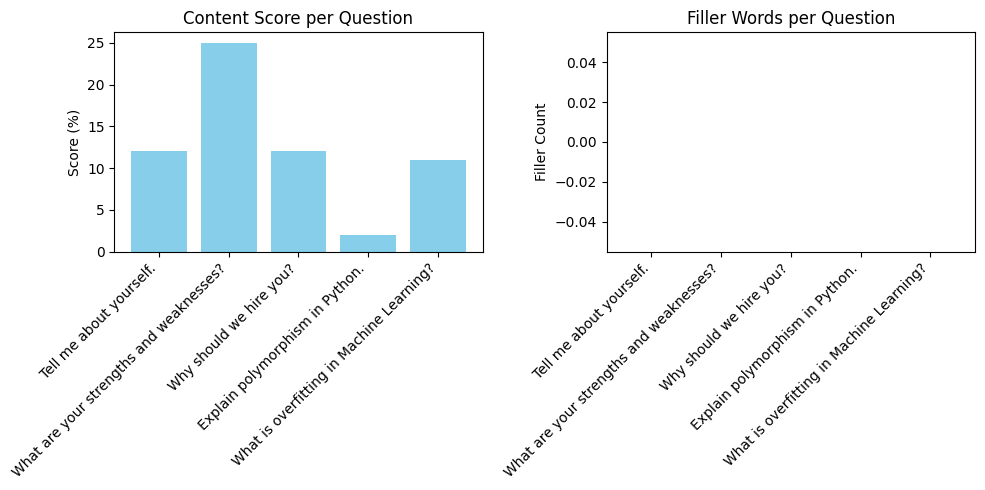

In [56]:
# =====================================
# 7. Performance Summary & Visualization
# =====================================
df = pd.DataFrame(results)
print("\n📊 Interview Summary:\n")
display(df)

avg_score = df['score'].mean()
avg_fillers = df['fillers'].mean()

print(f"\n🔹 Average Content Score: {avg_score:.1f}%")
print(f"🔹 Average Filler Words: {avg_fillers:.1f} per answer")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(df['question'], df['score'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Score (%)")
plt.title("Content Score per Question")

plt.subplot(1,2,2)
plt.bar(df['question'], df['fillers'], color='salmon')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Filler Count")
plt.title("Filler Words per Question")

plt.tight_layout()
plt.show()
